# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import os

# File to Load (Remember to change these)
city_data_to_load = os.path.join ("Resources","city_data.csv")
ride_data_to_load = os.path.join ("Resources","ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [2]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [3]:
pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2375 entries, 0 to 2374
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          2375 non-null   object 
 1   date          2375 non-null   object 
 2   fare          2375 non-null   float64
 3   ride_id       2375 non-null   int64  
 4   driver_count  2375 non-null   int64  
 5   type          2375 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 129.9+ KB


In [4]:
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [5]:
#  1. Get the total rides for each city type
total_rides = pyber_data_df.groupby("type").count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [6]:
# 2. Get the total drivers for each city type


In [7]:
#total_drivers = pyber_data_df.groupby("type").sum()["driver_count"]
#total_drivers 
#tried nunique, sum, count, none of them produce the right numbers. 
total_drivers = pyber_data_df.groupby(["type","city"]).mean()["driver_count"]
total_drivers

type   city               
Rural  Bradshawfurt            7.0
       Garzaport               7.0
       Harringtonfort          4.0
       Jessicaport             1.0
       Lake Jamie              4.0
                              ... 
Urban  West Patrickchester    25.0
       West Robert            39.0
       West Samuelburgh       73.0
       Williamsstad           59.0
       Williamsview           46.0
Name: driver_count, Length: 120, dtype: float64

In [8]:
total_drivers = total_drivers.reset_index()
total_drivers

,type,city,driver_count
0,Rural,Bradshawfurt,7.0
1,Rural,Garzaport,7.0
2,Rural,Harringtonfort,4.0
3,Rural,Jessicaport,1.0
4,Rural,Lake Jamie,4.0
...,...,...,...
115,Urban,West Patrickchester,25.0
116,Urban,West Robert,39.0
117,Urban,West Samuelburgh,73.0
118,Urban,Williamsstad,59.0


In [9]:
total_drivers = total_drivers.groupby("type").sum()["driver_count"]
total_drivers

type
Rural         78.0
Suburban     490.0
Urban       2405.0
Name: driver_count, dtype: float64

In [10]:
#  3. Get the total amount of fares for each city type
total_fares = pyber_data_df.groupby("type").sum()["fare"]
total_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [11]:
#  4. Get the average fare per ride for each city type. 
average_ride_fare = total_fares/total_rides
average_ride_fare

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [12]:
# 5. Get the average fare per driver for each city type. 
average_driver_fare = total_fares/total_drivers
average_driver_fare

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [13]:
#  6. Create a PyBer summary DataFrame. 

pyber_summary_df = pd.DataFrame({"Total Rides":total_rides, 
                                 "Total Drivers":total_drivers, 
                                 "Total Fares":total_fares, 
                                 "Average Fare per Ride":average_ride_fare, 
                                 "Average Fare per Driver":average_driver_fare})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78.0,4327.93,34.623440,55.486282
Suburban,625,490.0,19356.33,30.970128,39.502714
Urban,1625,2405.0,39854.38,24.525772,16.571468


In [14]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None

In [15]:
#  8. Format the columns.
pyber_summary_df["Total Fares"] = pyber_summary_df["Total Fares"].map("${:,.2f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,"$4,327.93",34.623440,55.486282
Suburban,625,490.0,"$19,356.33",30.970128,39.502714
Urban,1625,2405.0,"$39,854.38",24.525772,16.571468


In [16]:
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df[("Average Fare per Ride")].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df[("Average Fare per Driver")].map("${:,.2f}".format)

pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78.0,"$4,327.93",$34.62,$55.49
Suburban,625,490.0,"$19,356.33",$30.97,$39.50
Urban,1625,2405.0,"$39,854.38",$24.53,$16.57


In [17]:
pyber_summary_df["Total Drivers"] = pyber_summary_df[("Total Drivers")].map("{:,.0f}".format)
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,78,"$4,327.93",$34.62,$55.49
Suburban,625,490,"$19,356.33",$30.97,$39.50
Urban,1625,"2,405","$39,854.38",$24.53,$16.57


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [18]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


In [19]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.d
fares_per_type = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
fares_per_type

fare
type  date                      
Rural 2019-01-01 09:45:36  43.69
      2019-01-02 11:18:32  52.12
      2019-01-03 19:51:01  19.90
      2019-01-04 03:31:26  24.88
      2019-01-06 07:38:40  47.33
...                          ...
Urban 2019-05-08 04:20:00  21.99
      2019-05-08 04:39:49  18.45
      2019-05-08 07:29:01  18.55
      2019-05-08 11:38:35  19.77
      2019-05-08 13:10:18  18.04

[2375 rows x 1 columns]

In [20]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
fares_per_type=fares_per_type.reset_index()
fares_per_type

,type,date,fare
0,Rural,2019-01-01 09:45:36,43.69
1,Rural,2019-01-02 11:18:32,52.12
2,Rural,2019-01-03 19:51:01,19.90
3,Rural,2019-01-04 03:31:26,24.88
4,Rural,2019-01-06 07:38:40,47.33
...,...,...,...
2370,Urban,2019-05-08 04:20:00,21.99
2371,Urban,2019-05-08 04:39:49,18.45
2372,Urban,2019-05-08 07:29:01,18.55
2373,Urban,2019-05-08 11:38:35,19.77


In [21]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
fares_per_type_pivot = fares_per_type.pivot(index="date", columns="type", values="fare")
fares_per_type_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-05-08 04:20:00,NaN,NaN,21.99
2019-05-08 04:39:49,NaN,NaN,18.45
2019-05-08 07:29:01,NaN,NaN,18.55


In [22]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
##greater than the start date and smaller than the end date
#mask = (df['date'] > start_date) & (df['date'] <= end_date)
#df.loc['2014-01-01':'2014-02-01']
fares_per_type_pivot_lim = fares_per_type_pivot.loc['2019-01-01':'2019-04-29']

fares_per_type_pivot_lim.head()

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75


In [23]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
fares_per_type_pivot_lim.index = pd.to_datetime(fares_per_type_pivot_lim.index)
fares_per_type_pivot_lim

type,Rural,Suburban,Urban
date,,,
2019-01-01 00:08:16,NaN,NaN,37.91
2019-01-01 00:46:46,NaN,47.74,NaN
2019-01-01 02:07:24,NaN,24.07,NaN
2019-01-01 03:46:50,NaN,NaN,7.57
2019-01-01 05:23:21,NaN,NaN,10.75
...,...,...,...
2019-04-28 14:28:36,NaN,NaN,11.46
2019-04-28 16:29:16,NaN,NaN,36.42
2019-04-28 17:26:52,NaN,NaN,31.43


In [24]:
# 7. Check that the datatype for the index is datetime using df.info()
fares_per_type_pivot_lim.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2196 entries, 2019-01-01 00:08:16 to 2019-04-28 19:35:03
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     114 non-null    float64
 1   Suburban  573 non-null    float64
 2   Urban     1509 non-null   float64
dtypes: float64(3)
memory usage: 68.6 KB


In [25]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
#series.resample('W').sum()
fares_per_type_pivot_lim = fares_per_type_pivot_lim.resample("W").sum()
fares_per_type_pivot_lim

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


In [26]:
rural_fares = fares_per_type_pivot_lim["Rural"]
rural_fares

date
2019-01-06    187.92
2019-01-13     67.65
2019-01-20    306.00
2019-01-27    179.69
2019-02-03    333.08
2019-02-10    115.80
2019-02-17     95.82
2019-02-24    419.06
2019-03-03    175.14
2019-03-10    303.94
2019-03-17    163.39
2019-03-24    189.76
2019-03-31    199.42
2019-04-07    501.24
2019-04-14    269.79
2019-04-21    214.14
2019-04-28    191.85
Freq: W-SUN, Name: Rural, dtype: float64

In [27]:
suburban_fares = fares_per_type_pivot_lim["Suburban"]
suburban_fares

date
2019-01-06     721.60
2019-01-13    1105.13
2019-01-20    1218.20
2019-01-27    1203.28
2019-02-03    1042.79
2019-02-10     974.34
2019-02-17    1045.50
2019-02-24    1412.74
2019-03-03     858.46
2019-03-10     925.27
2019-03-17     906.20
2019-03-24    1122.20
2019-03-31    1045.06
2019-04-07    1010.73
2019-04-14     784.82
2019-04-21    1149.27
2019-04-28    1357.75
Freq: W-SUN, Name: Suburban, dtype: float64

In [28]:
urban_fares = fares_per_type_pivot_lim["Urban"]
urban_fares

date
2019-01-06    1661.68
2019-01-13    2050.43
2019-01-20    1939.02
2019-01-27    2129.51
2019-02-03    2086.94
2019-02-10    2162.64
2019-02-17    2235.07
2019-02-24    2466.29
2019-03-03    2218.20
2019-03-10    2470.93
2019-03-17    2044.42
2019-03-24    2368.37
2019-03-31    1942.77
2019-04-07    2356.70
2019-04-14    2390.72
2019-04-21    2303.80
2019-04-28    2238.29
Freq: W-SUN, Name: Urban, dtype: float64

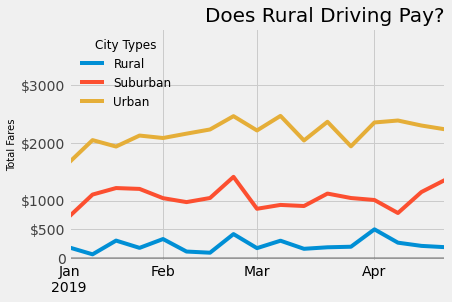

In [33]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
plt.style.use('fivethirtyeight')
weekly_ride_fare_data = [rural_fares, suburban_fares, urban_fares]
fares_graph = fares_per_type_pivot_lim.plot()


#format the graph
plt.ylim(-50,4000)
fares_graph.axhline(y=0, color='#414141', linewidth=1.5, alpha=.5)
fares_graph.set_yticks([0, 500, 1000, 2000, 3000])
fares_graph.set_yticklabels(labels=['0', '$500', '$1000', '$2000', '$3000'], fontsize=14, color='#414141')
plt.title("Does Rural Driving Pay?", loc= "right", fontsize ="20")
plt.xlabel("",fontsize=10)
plt.ylabel("Total Fares",fontsize=10)

lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="upper left", title="City Types", frameon=False)

lgnd.get_title().set_fontsize(12)

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary_a.png")
